    Quantifying a learning algorithm's performance and comparing different models are some of the common tasks when applying machine learning to real world applications
    
### Model Evaluation
    How well your model is performing after training the model? How to evaluate your model's performance?
    
    Initially, to evaluate the performance of your model, you will want to measure the error for the training set and  the test sets
    
     Test set(subset of training data that has not been exposed to the training)
    
        Evaluation of model
        --------------------
        Test error = cost on Test data = J_test without regularization
        Training error = cost on Training data = J_train without regularization
        
        
        Note:  Test error is to evaluate how well your model is performing and generalizing on unseen test data and lets you know if the model has overfit to your training set. Training error is to evaluate how well your model is performing on training data. Both also helps in identifying bias and variance problems
        
        Imp note: Note above evaluations will be without regularization. Cost we use for training will be the cost along with regularization cuz we are always training the model while regularizing the parameters. Below are the costs for reference.
        
               -  For regression, its MSE 
                            J_train_training = 1/2m Σ (f(X) - y)^2 + λ/2m Σ w^2
               
               -  For binary classification, its logistic loss or binary cross entropy, 
                                J_train_training = -1/m Σ y log (f(X) + (1-y) log(1-f(X)) + λ/2m Σ w^2
                                
               - For categorical classification, its sparse categorical cross entropy
                               J_train_training = - 1/m Σ log a + λ/2m Σ w^2
                
### Model Selection - Cross Validation
    What if we want to evaluate more than one model for the given training data?
    
    i.e models with different polynomial degrees i.w complex models or simple models
    i.e how to choose one best model among all the models of different complexity?
    
    Lets consider regression
    
    d = 1 ,     f(X) = w.x + b
    d = 2 ,     f(x) = w1 x + w2 x^2 + b (quadratic)
    d = 3 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + b (3rd order polynomial)
    d = 4 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + w4 x^4 + b (4th order polynomial)
    d = 5 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + w4 x^4 + w5 x^4 + b (5th order polynomial)
    
    How to select one best model among all the different models?
    
    Use Different subset other than test data from the training set. This set is called Cross validation set / validation set/ dev set.
    
    Above different models are evaluated using this cross validation set.
    
    i.e after training model of each degree polynomial, we test those parameters on the validation set and find out cost on cross validation set J_cv (note always the evaluations are without regularization term). We choose the model that has less cost on Cross validation set i.e less J_cv
    
    This way, cross validation set is used to select the degree of the model or complexity of the model or the type of the model or the model. Specifically it is used to evaluate the different model configurations you are choosing from. For example, you can use this to make a decision on what "polynomial features" to add to your dataset.
    
    *training set* - used to train the model
    *test set* - used to give a fair estimate of your chosen model's performance against new examples. This should not be used to make decisions while you are still developing the models.
        
        So now the process is, for each different model we train and evaluate using training set and cross validation sets inorder to select the final model. Once the final model is selected, we use test set to finally evalute the model to get the estimation of true generalization.
        
        Note: The one above is hold out cross validation. There are other different type of cross validations, kfold, stratified k fold, leave one out..Cross validation is further improvised to use the entire training set instead of holding out some examples. The training set is divided into k folds and then each fold is used as validation set for model selection atleast once
        
    In this lab, we will perform the below steps for model selection and evaluation for regression, neural networks, classification with neural networks
    
          -  split datasets into training, cross validation, and test sets
          -  evaluate regression and classification models
          -  add polynomial features to improve the performance of a linear regression model
          -  compare several neural network architectures
      -------------------------------------------------------------------------------------------------------------     
       data	            |    % of total	    |            Description
      -------------------------------------------------------------------------------------------------------------
          training	    |        60	        |     Data used to tune model parameters w and b in training or fitting
        cross-validation|	     20	        |      Data used to tune other model parameters like degree of polynomial,  
                        |                   |      regularization or the architecture of a neural network.
          test	        |        20	        |      Data used to test the model after tuning to gauge performance on new data

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.activations import relu, sigmoid, softmax, linear
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError, SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

tf.get_logger().setLevel("ERROR")
tf.autograph.set_verbosity(0)
np.set_printoptions(precision=2)

##### Lets handle model evaluation and selection in regression

In [21]:
#Loading the regression data
data = np.loadtxt("./data_w3_ex1.csv", delimiter=",")
# Split the inputs and outputs into separate arrays
X = data[:, 0] #this way we get data as 1D. data[:, :1] - we get 2D data
y = data[:, 1]
print(X.shape)
print(y.shape)

(50,)
(50,)


In [22]:
#lets make the data to 2D for future purposes
#here we use expand_dims. Note reshape also works
X = np.expand_dims(X, axis=1)
y = np.expand_dims(y, axis=1)
print(f"X.shape {X.shape}")
print(f"y.shape {y.shape}")
print(f"First five elements of X {X[:5]}")
print(f"First five elements of y {y[:5]}")

X.shape (50, 1)
y.shape (50, 1)
First five elements of X [[1651.  ]
 [1691.82]
 [1732.63]
 [1773.45]
 [1814.27]]
First five elements of y [[432.65]
 [454.94]
 [471.53]
 [482.51]
 [468.36]]


In [12]:
#Splitting the data into training set, test set and validation set
x_train, x_, y_train, y_ = train_test_split(X, y, test_size=0.4, random_state=1)

#splitting the splitted test above (test set) to again to 2 halves to have a test set and validation set
x_val, x_test, y_val, y_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

#del the temporary variables that are not in use
del x_, y_
print(f"Training set: X_train.shape {x_train.shape}, y_train.shape {y_train.shape}")
print(f"Validation set: X_val.shape {x_val.shape}, y_val.shape {y_val.shape}")
print(f"Test set: X_test.shape {x_test.shape}, y_test.shape {y_test.shape}")

Training set: X_train.shape (30, 1), y_train.shape (30, 1)
Validation set: X_val.shape (10, 1), y_val.shape (10, 1)
Test set: X_test.shape (10, 1), y_test.shape (10, 1)


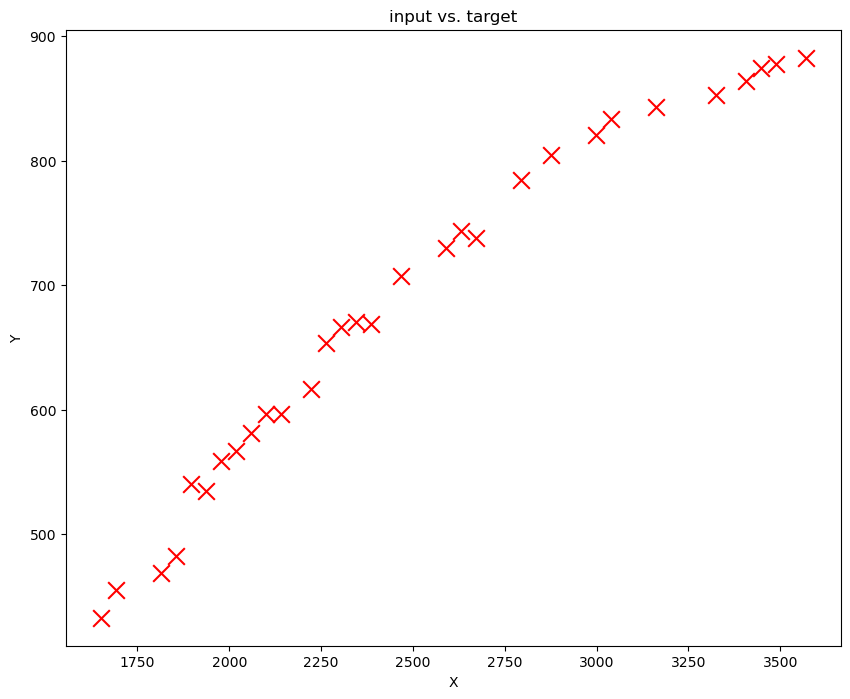

In [55]:
#Plot the training data
def plot_dataset(x=X, y=y, title="input vs. target"):
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.rcParams["lines.markersize"] = 12
    fig, ax = plt.subplots(1, 1)
    ax.scatter(x, y, c="r", marker="x")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(title)
    plt.show()

plot_dataset(x=x_train, y=y_train)

#### Feature scaling
    In the previous course of this specialization, you saw that it is usually a good idea to perform feature scaling to help your model converge faster. This is especially true if your input features have widely different ranges of values. Later in this lab, you will be adding polynomial terms so your input features will indeed have different ranges. For example, 
    
    x runs from around 1600 to 3600, while x^2 will run from 2.56 million to 12.96 million.

    You will only use single feature x for this first model but it's good to practice feature scaling now so you can apply it later. For that, you will use the StandardScaler class from scikit-learn. This computes the z-score of your inputs. As a refresher, the z-score is given by the equation: (chnages to mean to 0 and sd to 1)
                         
                                 z = x - mu / sigma

 
    where 
         mu is the mean of the feature values and 
         sigma is the standard deviation. 
         
    The code below shows how to prepare the training set using the said class. You can plot the results again to inspect if it still follows the same pattern as before. The new graph should have a reduced range of values for x.

Computed mean of the training set: 2504.06
Computed standard deviation of the training set: 574.85


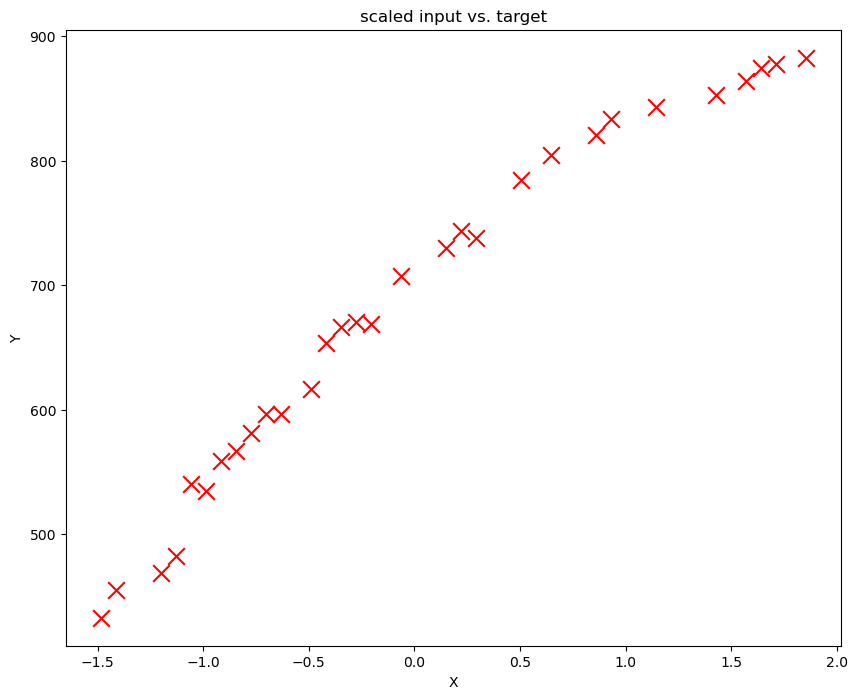

In [56]:
# Initialize the class
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set using fit and then transform it
X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"Computed mean of the training set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Computed standard deviation of the training set: {scaler_linear.scale_.squeeze():.2f}")


plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs. target")

In [57]:
#First lets train our data with simple regression model i.e linear model of degree 1 => f(X) = w.x + b
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

#### Evaluate the Model
    To evaluate the performance of your model, you will want to measure the error for the training and cross validation sets. For the training error, recall the equation for calculating the mean squared error (MSE):

                         J_train = 1/2m Σ (f(X) - y)^2 
                         
    Scikit-learn also has a built-in mean_squared_error() function that you can use. Take note though that as per the documentation, scikit-learn's implementation only divides by m and not 2*m (where m = number of examples). Thus, to match the equation above, you can use the scikit-learn function then divide by two as shown below. We also included a for-loop implementation so you can check that it's equal.

    Another thing to take note: since you trained the model on scaled values (i.e. using the z-score), you should also feed in the scaled training set instead of its raw values.

In [58]:
#model evaluation
y_train_preds = linear_model.predict(X_train_scaled)

J_train_linear = mean_squared_error(y_true=y_train, y_pred=y_train_preds) / 2

# Use scikit-learn's utility function and divide by 2
print(f"training MSE (using sklearn function): {J_train_linear:.2f}")

#for loop implementation of mse
total_error = 0
for i in range(len(X_train_scaled)):
    error = (y_train_preds[i] - y_train[i]) ** 2
    total_error += error
total_error = total_error / (2 * len(y_train))
print(f"training MSE (using for loop): {total_error.squeeze():.2f}")

training MSE (using sklearn function): 406.19
training MSE (using for loop): 406.19


    You can then compute the MSE for the cross validation set with basically the same equation:
    
                            J_cv = 1/2m Σ (f(X) - y)^2 

     As with the training set, you will also want to scale the cross validation set. An important thing to note when using the z-score is you have to use the mean and standard deviation of the training set when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

        Say that your training set has an input feature equal to 500 which is scaled down to 0.5 using the z-score.
        After training, your model is able to accurately map this scaled input x=0.5 to the target output y=300.
        Now let's say that you deployed this model and one of your users fed it a sample equal to 500.
        If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to 0.5 and your model will most likely make a wrong prediction (i.e. not equal to y=300).
    
        You will scale the cross validation set below by using the same StandardScaler you used earlier but only calling its transform() method instead of fit_transform().

In [60]:
#scaling cross validation set and calculating cost of cv set

# Scale the cross validation set using the mean and standard deviation of the training set
X_val_scaled = scaler_linear.transform(x_val)

# Feed the scaled cross validation set
y_val_preds = linear_model.predict(X_val_scaled)

#calulating cost of cross validation set
J_val_linear = mean_squared_error(y_val, y_val_preds) / 2
print(f"Validation set MSE (using sklearn function): {J_val_linear:.2f}")

#for loop implementation of mse
total_error = 0
for i in range(len(X_val_scaled)):
    error = (y_val_preds[i] - y_val[i]) ** 2
    total_error += error
total_error = total_error / (2 * len(y_val))
print(f"Validation set MSE (using for loop): {total_error.squeeze():.2f}")

Validation set MSE (using sklearn function): 551.78
Validation set MSE (using for loop): 551.78


#### Adding Polynomial Features
    From the graphs earlier, you may have noticed that the target y rises more sharply at smaller values of x compared to higher ones. A straight line i.e linear regression might not be the best choice because the target y seems to flatten out as x increases. Also observe how the model is perfoming on the training set(check MSE) which is very bad. Needless to mention, it is performing very bad on cross validation set too.
    
    Now that you have these values of the training and cross validation MSE from the linear model, you can try adding polynomial features to see if you can get a better performance i.e increase the degree of model.This is the part of model selection. The code will mostly be the same but with a few extra preprocessing steps. Let's see that below.

#### Create the additional features
    First, you will generate the polynomial features from your training set. The code below demonstrates how to do this using the PolynomialFeatures class. It will create a new input feature which has the squared values of the input x (i.e. degree=2).

In [80]:
#adding more polynomial features 

#lets add the feature x^2 i.e increase the degree of model from 1 (linear) to 2(quadratic)
#linear = w.x + b
#quadratic = w1 x + w2 x^2 +  b

# Instantiate the class to make polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)

# Compute the number of features and transform the training set
X_train_mapped = poly.fit_transform(x_train)

# Preview the 
#No. of features in and no. of features out
#first 5 elements of the new training set. Left column is `x` and right column is `x^2`
# Note: The `e+<number>` in the output denotes how many places the decimal point should 
# be moved. For example, `3.24e+03` is equal to `3240`
print(poly.n_features_in_)
print(poly.n_output_features_)
print(type(X_train_mapped))
print(X_train_mapped[:5])


1
2
<class 'numpy.ndarray'>
[[3.32e+03 1.11e+07]
 [2.34e+03 5.50e+06]
 [3.49e+03 1.22e+07]
 [2.63e+03 6.92e+06]
 [2.59e+03 6.71e+06]]


    You will then scale the inputs as before to narrow down the range of values.

In [81]:
#Instantiate
scaler_poly = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Preview the first 5 elements of the scaled training set.
print(X_train_mapped_scaled[:5])

[[ 1.43  1.47]
 [-0.28 -0.36]
 [ 1.71  1.84]
 [ 0.22  0.11]
 [ 0.15  0.04]]


    You can then proceed to train the model. After that, you will measure the model's performance against the cross validation set. Like before, you should make sure to perform the same transformations as you did in the training set. You will add the same number of polynomial features then scale the range of values.

In [82]:
model = LinearRegression() #note we are  using same linear regression cuz the model is linear model but the features are polynomial features to fit the complex data

#so now the model will be w1 x + w1 x^2 + b => linear model of degree 2 with polynomial features
model.fit(X_train_mapped_scaled, y_train)

LinearRegression()

In [83]:
#Perform the transformation on validation set

#creating the polynomial features for val set
X_val_mapped = poly.transform(x_val)

#scaling the feature
X_val_mapped_scaled = scaler_poly.transform(X_val_mapped)

In [84]:
#Evaluating the model with training and cross validation sets
y_train_preds = model.predict(X_train_mapped_scaled)
J_train = mean_squared_error(y_train, y_train_preds) / 2
print(f"Training MSE: {J_train:.2f}")

y_val_preds = model.predict(X_val_mapped_scaled)
J_val = mean_squared_error(y_val, y_val_preds) / 2
print(f"Validation MSE: {J_val:.2f}")

Training MSE: 49.11
Validation MSE: 87.70


    You'll notice that the MSEs are significantly better for both the training and cross validation set when you added the 2nd order polynomial. You may want to introduce more polynomial terms and see which one gives the best performance. As shown in class, you can have 10 different models like this:

                    d = 1 ,     f(X) = w.x + b
                    d = 2 ,     f(x) = w1 x + w2 x^2 + b (quadratic)
                    d = 3 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + b (3rd order polynomial)
                    d = 4 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + w4 x^4 + b (4th order polynomial)
                    d = 5 ,     f(x) = w1 x + w2 x^2 + w3 x^3 + w4 x^4 + w5 x^4 + b (5th order polynomial)
                        .
                        .
                    d = 10,     f(x) = w1 x + w2 x^2 + ............. + w10 x^10 + b (10th order polynomial)

    You can create a loop that contains all the steps in the previous code cells. Here is one implementation that adds polynomial features up to degree=10. We'll plot it at the end to make it easier to compare the results for each model.

[406.19374192533127, 49.11160933402512, 47.616322352982394, 47.1464664426365, 47.14257452630217, 41.383877925588145, 39.24961062724534, 38.98136379725413, 37.97170833883602, 37.03646961268759]
[551.7789026952216, 87.69841211111911, 81.15087907197008, 79.43134912070398, 79.58685943662647, 98.74226159573267, 99.32345423634305, 99.04845553297574, 109.58952940911834, 121.85070814895998]


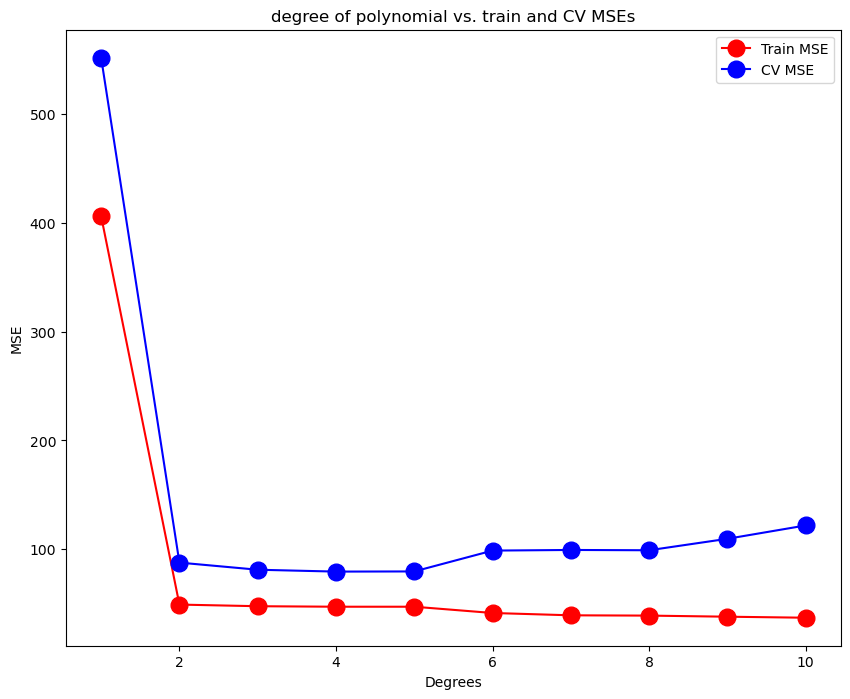

In [104]:
#Model training, selection and evaluation manually
train_mses = []
val_mses = []
models = []
scalers = []
#note: we are not saving the polynomial feature obj cuz, it  is just creating polynomial features like x^2, x^3. 
#We can directly use fit_transform for any set irrespective of training set.

for i in range(1, 11):
#     print(i) #starts from 1 to 10
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_mapped = poly.fit_transform(x_train)
    
    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    
    
    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    y_train_preds = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, y_train_preds) / 2
    train_mses.append(train_mse)
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_val_mapped = poly.fit_transform(x_val)
    X_val_mapped_scaled = scaler_poly.transform(X_val_mapped)
    
    y_val_preds = model.predict(X_val_mapped_scaled)
    val_mse = mean_squared_error(y_val, y_val_preds) / 2
    val_mses.append(val_mse)
    
    models.append(model)
    scalers.append(scaler_poly)

degrees = range(1, 11)
print(train_mses)
print(val_mses)

#plotting the results for model selection
def plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train Mse's"):
    fig, ax = plt.subplots(1, 1)
    ax.plot(degrees, train_mses, c="r",  marker='o', label="Train MSE")
    ax.plot(degrees, cv_mses, c="b",  marker='o', label="CV MSE")
    ax.legend()
    ax.set_title(title)
    ax.set_xlabel("Degrees")
    ax.set_ylabel("MSE")
    plt.show()
    
    

plot_train_cv_mses(degrees, train_mses, val_mses, title="degree of polynomial vs. train and CV MSEs")

##### Choosing the best model
    When selecting a model, you want to choose one that performs well both on the training and cross validation set. It implies that it is able to learn the patterns from your training set without overfitting. If you used the defaults in this lab, you will notice a sharp drop in cross validation error from the models with degree=1 to degree=2. This is followed by a relatively flat line up to degree=5. After that, however, the cross validation error is generally getting worse as you add more polynomial features. Given these, you can decide to use the model with the lowest cv_mse as the one best suited for your application.

In [105]:
# Get the model with the lowest CV MSE (add 1 because list indices start at 0)
# This also corresponds to the degree of the polynomial added
degree = np.argmin(val_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


    You can then publish the generalization error by computing the test set's MSE. As usual, you should transform this data the same way you did with the training and cross validation sets

In [107]:
#get the model of degree 4 from the saved models
final_model = models[degree - 1] #idx starts from 0

#creating polynomial features for test set
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_test_mapped = poly.fit_transform(x_test)

#scaling with training scaler
final_scaler = scalers[degree-1]
X_test_mapped_scaled = final_scaler.transform(X_test_mapped)

#evaluate the final model on the test set
y_test_preds = final_model.predict(X_test_mapped_scaled)
test_error = mean_squared_error(y_test, y_test_preds) / 2
print(f"Training MSE: {train_mses[degree-1]:.2f}")
print(f"Cross Validation MSE: {val_mses[degree-1]:.2f}")
print(f"Test error: {test_error:.2f}")

Training MSE: 47.15
Cross Validation MSE: 79.43
Test error: 104.63


#### Model selection for Neural Networks
    The same model selection process can also be used when choosing between different neural network architectures. In this section, you will create the models shown below and apply it to the same regression task above.
    
    You will use the same training, cross validation, and test sets you generated in the previous section. From earlier lectures in this course, you may have known that neural networks can learn non-linear relationships so you can opt to skip adding polynomial features. The code is still included below in case you want to try later and see what effect it will have on your results. The default degree is set to 1 to indicate that it will just use x_train, x_cv, and x_test as is (i.e. without any additional polynomial features).
    Next, you will scale the input features to help gradient descent converge faster. Again, notice that you are using the mean and standard deviation computed from the training set by just using transform() in the cross validation and test sets instead of fit_transform().

In [117]:
#Neural network for regression

#Preparing the training and validation data
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=False)
x_train_mapped = poly.fit_transform(x_train)
x_val_mapped = poly.transform(x_val)
x_test_mapped = poly.transform(x_test)

#scaling . we can also use tf.keras.Normalize
scaler = StandardScaler()
x_train_mapped_scaled = scaler.fit_transform(x_train_mapped)
x_val_mapped_scaled = scaler.transform(x_val_mapped)
x_test_mapped_scaled = scaler.transform(x_test_mapped)

(30, 1)


In [ ]:
#Building the model architecture to select from
def build_models():
    model_1 = Sequential([
        Dense(units=25, activation=relu),
        Dense(units=15, activation=relu),
        Dense(units=1, activation=linear)

    ], name="model1")

    model_2 = Sequential([
        Dense(units=20, activation=relu),
        Dense(units=12, activation=relu),
        Dense(units=12, activation=relu),
        Dense(units=20, activation=relu),
        Dense(units=1, activation=linear)
    ], name="model2")

    model_3 = Sequential([
        Dense(units=32, activation=relu),
        Dense(units=16, activation=relu),
        Dense(units=18, activation=relu),
        Dense(units=4, activation=relu),
        Dense(units=12, activation=relu),
        Dense(units=1, activation=linear)
    ], name="model3")
    return(model_1, model_2, model_3)

In [119]:
#model selection process
nn_train_mses = []
nn_val_mses = []

nn_models = build_models()
# print(models)

for model in nn_models:
    print(f"Training {model.name}...")
    model.compile(loss="mse",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    
    model.fit(x_train_mapped_scaled, y_train, epochs=300, verbose=0)
    print("Done!\n")
    
    #calculating training predictions
    y_train_preds = model.predict(x_train_mapped_scaled, verbose=0)
    
    #calculate the training error using mean squared error
    train_mse = mean_squared_error(y_train, y_train_preds) / 2
    nn_train_mses.append(train_mse)
    
    y_val_preds = model.predict(x_val_mapped_scaled, verbose=0)
    #calculate the validation error using mean squared error
    val_mse = mean_squared_error(y_val, y_val_preds) / 2
    nn_val_mses.append(val_mse)
     
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num + 1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_val_mses[model_num]:.2f}"
        )

Training model1...
Done!

Training model2...
Done!

Training model3...
Done!

RESULTS:
Model 1: Training MSE: 238.55, CV MSE: 339.08
Model 2: Training MSE: 75.19, CV MSE: 111.82
Model 3: Training MSE: 405.40, CV MSE: 551.32


    From the recorded errors, you can decide which is the best model for your application. Look at the results above and see if you agree with the selected model_num below. Finally, you will compute the test error to estimate how well it generalizes to new examples.

In [123]:
model_num = 2
final_nn_model = nn_models[model_num-1]
y_test_preds = final_nn_model.predict(x_test_mapped_scaled)
y_test_mse = mean_squared_error(y_test, y_test_preds) / 2
print(
        f"Final Model {model_num}: Training MSE: {nn_train_mses[model_num-1]:.2f}, " +
        f"CV MSE: {nn_val_mses[model_num-1]:.2f}, " +
        f"Test Mse: {y_test_mse:.2f}"
        )

1/1 [==============================] - 0s 16ms/step
Final Model 2: Training MSE: 75.19, CV MSE: 111.82, Test Mse: 121.85


#### Model selection for Classification with Neural networks
    In this last part of the lab, you will practice model evaluation and selection on a classification task. The process will be similar, with the main difference being the computation of the errors. You will see that in the following sections
    
    Load the Dataset
    ----------------
    First, you will load a dataset for a binary classification task. It has 200 examples of two input features (x1 and x2), and a target y of either 0 or 1.

In [128]:
data = np.loadtxt("./data_w3_ex2.csv", delimiter=",")
x_bc = data[:, :-1]
y_bc = data[:, -1]

# Convert y into 2-D because the commands later will require it (x is already 2-D)
y_bc= np.expand_dims(y_bc, axis=1)
#y = y[:, np.newaxis]

print(x_bc.shape)
print(y_bc.shape)
print(x_bc[:5])
print(np.unique(y_bc))

(200, 2)
(200, 1)
[[1000.   1457.29]
 [1045.23 1005.03]
 [1090.45  854.27]
 [1135.68 2562.81]
 [1180.9  4623.12]]
[0. 1.]


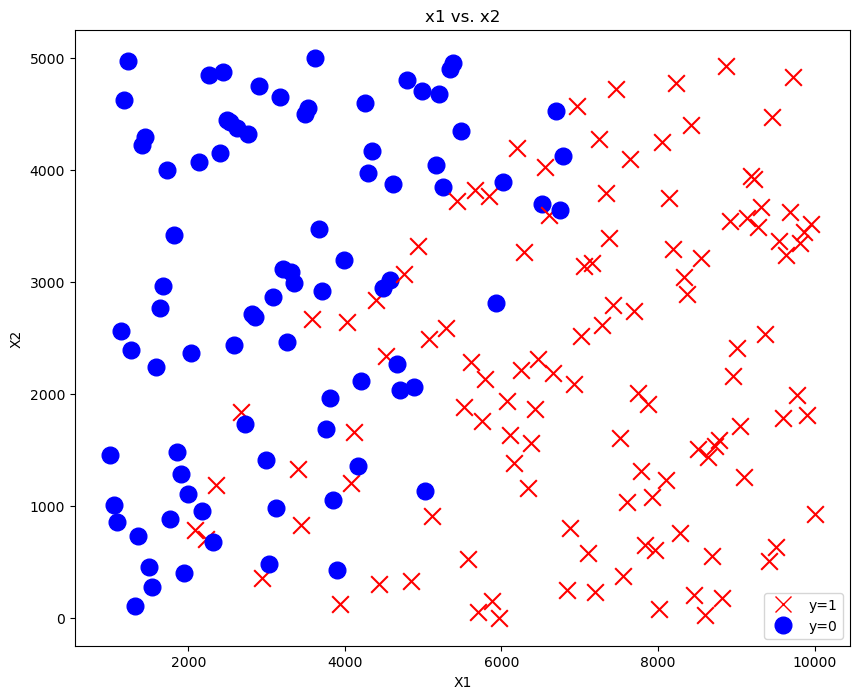

In [145]:
#plot the binary categorical data
import matplotlib.lines as mlines

def plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs. x2"):
#     y = y.reshape(-1)
#     pos = y==1.
#     neg = y==0.
#     plt.scatter(x[pos, 0], x[pos, 1], label="y=1", marker="x", color="red")
#     plt.scatter(x[neg, 0], x[neg, 1], label="y=0", marker="o", facecolors="none", edgecolors="blue")
    for i in range(len(y)):
        marker = "x" if y[i]==1 else "o"
        c = "red" if y[i]==1 else "blue"
        plt.scatter(x[i, 0], x[i, 1], marker=marker, c=c);
    
    plt.title("x1 vs x2")
    plt.xlabel("X1")
    plt.ylabel("X2")
    #to create legend
    y_0 = mlines.Line2D([], [], color='r', marker='x', markersize=12, linestyle='None', label='y=1')
    y_1 = mlines.Line2D([], [], color='b', marker='o', markersize=12, linestyle='None', label='y=0')
    plt.title(title)
    plt.legend(handles=[y_0, y_1])
    plt.show()

plot_bc_dataset(x=x_bc, y=y_bc)

In [149]:
#Splitting the data
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_bc_val, x_bc_test, y_bc_val, y_bc_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_val.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_val.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


#### Evaluating the error for classification models
    In the previous sections on regression models, you used the mean squared error to measure how well your model is doing. For classification, you can get a similar metric by getting the fraction of the data that the model has misclassified. For example, if your model made wrong predictions for 2 samples out of 5, then you will report an error of 40% or 0.4. The code below demonstrates this using a for-loop and also with Numpy's mean() function

In [148]:
#counting missclasifications using for loop and np.mean

# Sample model output
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

#sample Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

#applying threshold to get the predcitions
predictions = np.where(probabilities >= 0.5, 1, 0)

#calculating the missclassfied prediction
misclassified = 0 #counter for misclassfied
for i in range(len(predictions)):
    if predictions[i] != ground_truth[i]:
        misclassified += 1

#Compute the fraction of the data that the model misclassified
fraction_error = misclassified / len(predictions) 
    
print(f"probabilities: {probabilities}")
print(f"predictions with threshold=0.5: {predictions}")
print(f"targets: {ground_truth}")
print(f"fraction of misclassified data (for-loop): {fraction_error}")
print(f"fraction of misclassified data (with np.mean()): {np.mean(predictions != ground_truth)}")

probabilities: [0.2 0.6 0.7 0.3 0.8]
predictions with threshold=0.5: [0 1 1 0 1]
targets: [1 1 1 1 1]
fraction of misclassified data (for-loop): 0.4
fraction of misclassified data (with np.mean()): 0.4


#### Build and train the model
    You will use the same neural network architectures in the previous section so you can call the build_models() function again to create new instances of these models.

    You will follow the recommended approach mentioned last week where you use a linear activation for the output layer (instead of sigmoid) then set from_logits=True when declaring the loss function of the model. You will use the binary crossentropy loss because this is a binary classification problem.

    After training, you will use a sigmoid function to convert the model outputs into probabilities. From there, you can set a threshold and get the fraction of misclassified examples from the training and cross validation sets.

    You can see all these in the code cell below.
    
    Note we didnt do scaling here, but do it.

In [151]:
#model selection process
nn_train_bc_fraction_errors = []
nn_val_bc_fraction_errors = []

nn_bc_models = build_models()
# print(models)

for model in nn_bc_models:
    print(f"Training {model.name}...")
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
    
    model.fit(x_bc_train, y_bc_train, epochs=200, verbose=0)
    print("Done!\n")
    
    #calculating training logits
    y_train_logits = model.predict(x_bc_train, verbose=0)
    
    #prediction probabilities
    y_train_probs = tf.nn.sigmoid(y_train_logits)
    
    #applying threshold for predictions
    y_train_preds = np.where(y_train_probs >= 0.5, 1, 0)
    
    #calculate the training error using np.mean
    train_fraction_error = np.mean(y_train_preds != y_bc_train)
    nn_train_bc_fraction_errors.append(train_fraction_error)
    
    y_val_logits = model.predict(x_bc_val, verbose=0)
    y_val_probs = tf.nn.sigmoid(y_val_logits)
    y_val_preds = np.where(y_val_probs >= 0.5, 1, 0)
    
    #calculate the validation fraction error using np.mean
    val_fraction_error = np.mean(y_val_preds != y_bc_val)
    nn_val_bc_fraction_errors.append(val_fraction_error)
     
# print results
print("RESULTS:")
for model_num in range(len(nn_train_bc_fraction_errors)):
    print(
        f"Model {model_num + 1}: Training Set Classification Error: {nn_train_bc_fraction_errors[model_num]:.5f}, " +
        f"CV Set Classification Error: {nn_val_bc_fraction_errors[model_num]:.5f}"
        )

Training model1...
Done!

Training model2...
Done!

Training model3...
Done!

RESULTS:
Model 1: Training Set Classification Error: 0.18333, CV Set Classification Error: 0.12500
Model 2: Training Set Classification Error: 0.15000, CV Set Classification Error: 0.07500
Model 3: Training Set Classification Error: 0.41667, CV Set Classification Error: 0.47500


In [153]:
#From the output above, you can choose which one performed best. 
#If there is a tie on the cross validation set error, 
#then you can pick the one with the lower training set error. 
#Finally, you can compute the test error to report the model's generalization error.

# Select the model with the lowest error
model_num = 2
threshold = 0.5

# Compute the test error
yhat = nn_bc_models[model_num-1].predict(x_bc_test, verbose=0)
yhat = tf.math.sigmoid(yhat)
yhat = np.where(yhat >= threshold, 1, 0)
nn_test_bc_error = np.mean(yhat != y_bc_test)

print(f"Selected Model: {model_num}")
print(f"Training Set Classification Error: {nn_train_bc_fraction_errors[model_num-1]:.4f}")
print(f"CV Set Classification Error: {nn_val_bc_fraction_errors[model_num-1]:.4f}")
print(f"Test Set Classification Error: {nn_test_bc_error:.4f}")

Selected Model: 2
Training Set Classification Error: 0.1500
CV Set Classification Error: 0.0750
Test Set Classification Error: 0.1500
